## Notebook

This notebook contains the documentation of the cleaning and modeling of machine learning for predicting poisonous mushrooms. This project implements a few ML algorithms on a normal clean dataset, as well as a version with reduced dimensions from Principal Component Analysis (PCA) for some of the algorithms.

## Table of Contents

**Background**

- The Data
- The Models

**Data Preprocessing**

- Importing dependencies
- Checking unique and missing values
- Deciding on columns with missing values
- Separating, scaling, and preprocessing data for models
- Creating a PCA of the data
- Splitting the Data

**Building and Testing the Models**

**Results and Analysis**


### The Data

The data used is the Secondary Mushroom Dataset by Dennis Wagner, D. Heider, and Georges Hattab. From 2021, courtesy of UC Irvine.

https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

The features used for the models (X) are different attributes of mushrooms, like color, size, and length. The target variable (y) is the `class` column, containing binary information about whether or not a given mushroom is poisonous.

### The Models

Several models will be created. Some will be trained on the typical preprocessed data, while others will be trained on pca data. This notebook will show the differences in performance between the models.

## Data Preprocessing

### Importing Dependencies

Several modules from the Scikit Learn library will be used:

- `StandardScaler`, `PCA`, and `train_test_split` will prepare the data into a format suitable for machine learning.
- `RandomForestClassifier` is the algorithm that the models will be based on.
- `confusion_matrix, accuracy_score, classification_report` from `sklearn.metrics` will evaluate the performance of the models using different metrics.

In [1]:
# import dependencies
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in csv data
df = pd.read_csv("Data Sources/SQL_Mushroom_Data.csv", delimiter=',')

In [3]:
df # view the dataset

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


### Checking unique and missing values

It appears that there are some empty null values. Below is a table showing all of the unique and missing values for each column.

In [4]:
# creating a summary table showing each column, its data type, number of unique values, and missing values
summary_data = [(x, df[x].dtype,
                 len(df[x].unique()),
                 len(df[df[x].isna()])) for x in df.columns]

summary_table = pd.DataFrame(summary_data, columns=['Column','Data Type',
                                                    'Unique Values', 'Missing Values'])
summary_table['Percentage'] = round(summary_table['Missing Values'] / len(df), 2)

summary_table.sort_values('Missing Values', ascending=False)

,Column,Data Type,Unique Values,Missing Values,Percentage
14,veil-type,object,2,57892,0.95
18,spore-print-color,object,8,54715,0.90
15,veil-color,object,7,53656,0.88
11,stem-root,object,6,51538,0.84
12,stem-surface,object,9,38124,0.62
7,gill-spacing,object,4,25063,0.41
3,cap-surface,object,12,14120,0.23
6,gill-attachment,object,8,9884,0.16
17,ring-type,object,9,2471,0.04
0,class,object,2,0,0.00


### Deciding on columns with missing values
Five columns contained a significant amount of missing values (more than 60% of the values for that column). Our group ultimately decided to drop those columns entirely. We figured that those columns would not contribute much to the models anyway, since there is so little data.

In [5]:
# dropping columns with excessive missing values (30,000 or more)
df = df.drop(columns=['stem-root', 'stem-surface',
                      'veil-type', 'veil-color',
                      'spore-print-color'], axis=1)

# dropping remaining rows with na values
df = df.dropna()

### Separating, scaling, and preprocessing data for models

X is assigned from dropping the target variable (class) from the rest of the data. It is then split between categorical and numeric columns. `StandardScalar` scales the numerical data, so that equal importance is placed on the features. `pd.get_dummies` is used on the categorical variables to convert them into a format the the algorithm will understand. The two parts were then concatenated back into a single `X_clean` variable.

In [6]:
# separating the target variable
X = df.drop(columns='class')
X = X.reset_index(drop=True)

# separating categorical from numerical features
X_categorical = X.select_dtypes(include='O')
X_numeric = X.select_dtypes(exclude='O')

# scaling numerical features
X_numeric_scaled = StandardScaler().fit_transform(X_numeric)
X_numeric_scaled = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns)

# getting dummies of the categorical features
dummies = pd.get_dummies(X_categorical, dtype=int)

# concatenating dummies to the numeric columns
X_clean = pd.concat([dummies, X_numeric_scaled], axis=1)

### Creating a PCA version of the data

Because the dataset contains more than 80 columns after preprocessing, a second dataset was created. PCA was used on this dataset using `fit_transform`, reducing the number of dimensions for the model to train on. The `n_components` was set to 5 to allow for the highest accuracy without having more dimensions than needed.

In [7]:
# Instantiate PCA and fit the model
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_clean)

X_pca[:5]

array([[ 1.52215957,  2.67622152, -0.20316036, -0.06917879,  0.67200715],
       [ 1.8258888 ,  2.90185499, -0.25972312, -0.16862525,  0.54125842],
       [ 2.20352224,  2.88626628, -0.10231944, -0.45014648,  0.45100048],
       [ 1.7872717 ,  2.58686651, -0.09514707, -0.36613839,  0.44960653],
       [ 1.90265999,  2.7883164 , -0.11176634, -0.38057769,  0.48327003]])

In [8]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.20582689, 0.09903994, 0.05742793, 0.05001077, 0.04627046])

### Splitting the data

The training and testing data was split for both models.

In [9]:
# splitting training and testing for regular dataset
X_train, X_test, y_train, y_test = train_test_split(X_clean, df['class'])

# splitting training and testing for pca dataset
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, df['class'])

# Building and Testing the Models


## Random Forest Classifier with Original Data


### Fitting the Model


First the training and testing data were scaled into `X_train_scaled`, `X_test_scaled` Then the random forest classifier model was fit with the training data `X_train_scaled`, `y_train`.

In [10]:
# create StandardScaler instance for original dataset
scaler = StandardScaler()

In [11]:
# fit Standard Scaler
X_scaler = scaler.fit(X_train)

In [12]:
# scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=33)

In [14]:
# fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

### Predictions


The predictions were saved on the testing data and the fitted model using the testing feature data `X_test_scaled`. Then the testing data was used to generate the confusion matrix which allows model performance evaluation.

In [15]:
# make predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [16]:
# calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

### Random Forest Results with Original Data


Printing the confusion matrix shows the number of correct predictions: true positives and true negatives. It also prints the model's errors in false positives and false negatives. This first model has an accuracy of 52%, allowing room for optimization and better results.

In [17]:
# displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,962,1499
Actual 1,1185,1914


Accuracy Score : 0.5172661870503598
Classification Report
              precision    recall  f1-score   support

           e       0.45      0.39      0.42      2461
           p       0.56      0.62      0.59      3099

    accuracy                           0.52      5560
   macro avg       0.50      0.50      0.50      5560
weighted avg       0.51      0.52      0.51      5560



### Variable Importance


This is a score that helps indicate how 'important' a feature is to a model.

In [18]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.009674525524928148, 'cap-surface'),
 (0.007406345855690181, 'gill-spacing'),
 (0.006376927139413204, 'gill-attachment'),
 (0.004228351276967827, 'season'),
 (0.003035698643995033, 'stem-color'),
 (0.0025876809087523175, 'gill-color'),
 (0.0024701882195054575, 'cap-diameter'),
 (0.001056705811495739, 'ring-type'),
 (0.0009800593623716025, 'does-bruise-or-bleed'),
 (0.0009177499849982524, 'stem-height'),
 (0.0004970077945831729, 'has-ring'),
 (0.0004237539740511489, 'stem-width'),
 (0.00042256783382469586, 'habitat'),
 (0.00035340524271737907, 'cap-color'),
 (0.00026205865032429823, 'cap-shape')]

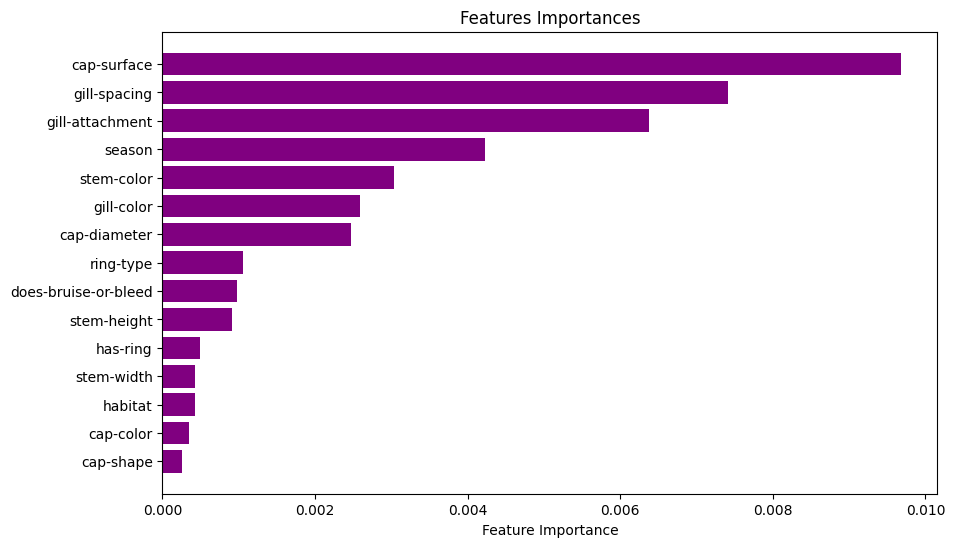

In [19]:
# visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
# importances_sorted.plot(kind='barh', color='purple', title= 'Features Importances', legend=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_sorted.index, importances_sorted['Feature Importances'], color='purple')
plt.xlabel('Feature Importance')
plt.title('Features Importances')
plt.show()

## Create Logistic Regression Model with original data

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes, 'e' or 'p' in this instance.

In [20]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=3)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=3)

In [21]:
# Make a prediction using the testing data
predictions2 = classifier.predict(X_test)

### Logistic Regression Results with Original Data

By examining the confusion matrix, we can see that for this model, there is an unusually high amount of false positives. When reviewing the classification report, the accuracy is shown to be 55% leaving room for improvement.

In [22]:
# Generate a confusion matrix for the model
confusion2 = confusion_matrix(y_test, predictions2)
print(confusion2)

[[  93 2368]
 [ 139 2960]]


In [23]:
# Print the classification report for the model
classification_test = classification_report(y_test, predictions2)
print(classification_test)

              precision    recall  f1-score   support

           e       0.40      0.04      0.07      2461
           p       0.56      0.96      0.70      3099

    accuracy                           0.55      5560
   macro avg       0.48      0.50      0.39      5560
weighted avg       0.49      0.55      0.42      5560



## Running random forest classifier with pca data

In an effort to improve results, the same steps are run with the PCA data.

In [24]:
# create StandardScaler instance with pca data
pca_scaler = StandardScaler()

In [25]:
# fit pca data Standard Scaler
X_pca_scaler = scaler.fit(X_pca_train)

In [26]:
# scale the pca data
X_pca_train_scaled = X_pca_scaler.transform(X_pca_train)
X_pca_test_scaled = X_pca_scaler.transform(X_pca_test)

In [27]:
# Create a random forest classifier with pca data
rf_pca_model = RandomForestClassifier(n_estimators=300, random_state=33)

In [28]:
# Fitting the model with pca data
rf_pca_model = rf_pca_model.fit(X_pca_train_scaled, y_train)

In [29]:
# Making predictions using the testing data with pca data
pca_predictions = rf_pca_model.predict(X_pca_test_scaled)

In [30]:
# Calculating the confusion matrix with pca data
pca_cm = confusion_matrix(y_test, pca_predictions)
pca_cm_df = pd.DataFrame(
    pca_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score with pca data
pca_acc_score = accuracy_score(y_test, pca_predictions)

### Random Forest Classifier Results with PCA Data

There are far fewer false positives and false negatives when using PCA data. The accuracy also improves to 99% when running with the PCA data.

In [31]:
# Displaying results with pca data
print("Confusion Matrix")
display(pca_cm_df)
print(f"Accuracy Score : {pca_acc_score}")
print("Classification Report")
print(classification_report(y_test, pca_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2426,35
Actual 1,30,3069


Accuracy Score : 0.9883093525179856
Classification Report
              precision    recall  f1-score   support

           e       0.99      0.99      0.99      2461
           p       0.99      0.99      0.99      3099

    accuracy                           0.99      5560
   macro avg       0.99      0.99      0.99      5560
weighted avg       0.99      0.99      0.99      5560



In [32]:
# Random Forests in sklearn will automatically calculate feature importance
pca_importances = rf_pca_model.feature_importances_
# We can sort the features by their importance
sorted(zip([f'PCA {x}' for x in range(1, len(pca_importances) + 1)],
           rf_pca_model.feature_importances_), reverse=False)

[('PCA 1', 0.20614116789239775),
 ('PCA 2', 0.18289484986518909),
 ('PCA 3', 0.32833003445650305),
 ('PCA 4', 0.12585325034022013),
 ('PCA 5', 0.15678069744569004)]

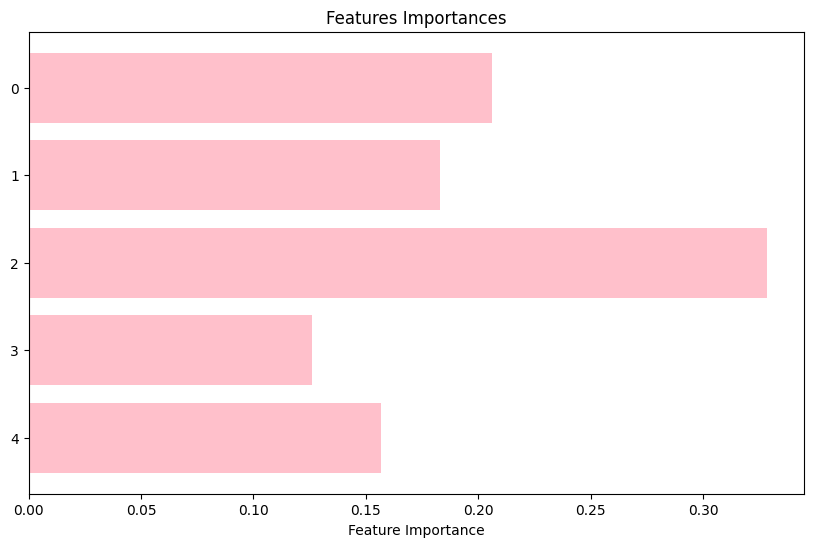

In [33]:
# Visualize the features by importance
pca_importances_df = pd.DataFrame(rf_pca_model.feature_importances_)

plt.figure(figsize=(10, 6))
plt.barh(range(len(pca_importances_df)), pca_importances_df[0], color='pink')
plt.yticks(range(len(pca_importances_df)), pca_importances_df.index)
plt.xlabel('Feature Importance')
plt.title('Features Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

### Running Logistic Regression Model with PCA data

Using PCA data in efforts to improve model classification accuracy. Using the same steps as were run with the original data.

In [34]:
# Instantiate PCA and fit the model
pca2 = PCA(n_components=5)
X_pca2 = pca2.fit_transform(X_clean)

X_pca2[:5]

array([[ 1.52215957,  2.67622067, -0.20318828, -0.06921111,  0.67193625],
       [ 1.8258888 ,  2.90185409, -0.25974782, -0.16865261,  0.54118911],
       [ 2.20352224,  2.8862653 , -0.1023734 , -0.45011908,  0.45086163],
       [ 1.7872717 ,  2.58686583, -0.0951918 , -0.36617462,  0.44952658],
       [ 1.90265999,  2.78831536, -0.11181816, -0.38055845,  0.48315099]])

In [35]:
# Calculate the PCA explained variance ratio
pca2.explained_variance_ratio_

array([0.20582689, 0.09903994, 0.05742793, 0.05001077, 0.04627046])

In [36]:
# splitting training and testing for pca dataset
X_pca_train2, X_pca_test2, y_train, y_test = train_test_split(X_pca2, df['class'])

In [37]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
pca_classifier = LogisticRegression(solver='lbfgs',
                                max_iter=300,
                                random_state=3)

# Fit the model using training data
pca_classifier.fit(X_pca_train2, y_train)

LogisticRegression(max_iter=300, random_state=3)

In [38]:
# Make a prediction using the testing data
predictions_pca = pca_classifier.predict(X_pca_test2)

### Logistic Regression Model Results with PCA Data

This model with the PCA data does a much better job at reducing the amount of false positives that are seen. The accuracy improves almost 20% to 72% as well, yielding significantly better results than before.


In [39]:
# Generate a confusion matrix for the model
confusion_pca = confusion_matrix(y_test, predictions_pca)
print(confusion_pca)

[[1554  975]
 [ 607 2424]]


In [40]:
# Print the classification report for the model
classification_test_pca = classification_report(y_test, predictions_pca)
print(classification_test_pca)

              precision    recall  f1-score   support

           e       0.72      0.61      0.66      2529
           p       0.71      0.80      0.75      3031

    accuracy                           0.72      5560
   macro avg       0.72      0.71      0.71      5560
weighted avg       0.72      0.72      0.71      5560



## YDF (Yggrasil Decision Forest)

Lastly, the Gradient Boosted Trees model was used with the original data.

In [41]:
# import dependencies
!pip install ydf -U
import ydf
import numpy as np

### Splitting the data

Instead of using scikitlearn's built in `train_test_split` function, the data was manually split into a 30/70 split for the testing and training sets respectively.

In [42]:
# Use the ~20% of the examples as the testing set
# and the remaining ~80% of the examples as the training set.
label="class"
np.random.seed(5)
is_test = np.random.rand(len(df)) < 0.3

In [43]:
#split datasets
train_dataset = df[~is_test]
test_dataset = df[is_test]

### Model Training

We started with a smaller number of trees, 100 to start with, using the `num_trees` feature. This allows opportunity for optimization if needed.

In [44]:
model = ydf.GradientBoostedTreesLearner(label=label, num_trees=100).train(train_dataset)

Train model on 15687 examples
Model trained in 0:00:04.400210


### Results with YDF Gradient Boosted Trees

Accuracy using 100 trees is shown to be 100%. The tree plot below shows the various nodes that are part of our tree model. Both the training dataset and testing dataset confusion matrices are available in the model.describe and model.evaluate boxes respectively.

In [45]:
model.describe()

In [46]:
model.plot_tree()

In [47]:
model.evaluate(test_dataset)

Label \ Pred,p,e
p,3629,0
e,0,2923


In [48]:
model.analyze(test_dataset)

### Optimizing YDF Gradient Boosted Trees

If accuracy had not been 100% in the previous model, an easy way to optimize the model would be to increase the trees in the `num_trees` feature. For an example of how this could be done, a second YDF Gradient Boosted Trees model was created with the trees set to 1,000.

In [49]:
model_optimized = ydf.GradientBoostedTreesLearner(label=label, num_trees=1000).train(train_dataset)

Train model on 15687 examples
Model trained in 0:00:38.776333


In [50]:
model_optimized.plot_tree()

In [51]:
model_optimized.evaluate(test_dataset)

Label \ Pred,p,e
p,3629,0
e,0,2923


In [52]:
print("Test accuracy: ", model_optimized.evaluate(train_dataset).accuracy)

Test accuracy:  1.0


In [53]:
print("Test accuracy: ", model_optimized.evaluate(test_dataset).accuracy)

Test accuracy:  1.0


# Results and Analysis

### Optimization

For both the logistic regression model and the random forest classifier, the PCA data was used in a second iteration for each model type. This increased the accuracy readings for both models at least 16%.

For the gradient boosted tree model, our initial model had already achieved 100% accuracy, but we wanted to provide a way to be able to optimize this model if we needed it. In the initial model, the `num_trees` had 100 trees as the input and one way to optimize the model is to increase this number. In the example we provided in the notebook, this was increased to 1,000 trees which also achieved 100% accuracy.

### Final Results

The random forest model trained on PCA data dramatically outperformed the logistic regression model with either the original dataset or PCA as well as the random forest model with original data. In a use case like this that is safety-related, it is crucial to obtain a near-perfect accuracy. Likewise, another major component is eliminating as many false negatives as possible. The precision and recall values for both outcomes are 98-99%.

The YDF gradient boosted trees model did come in with 100% accuracy in identifying the edible and poisonous mushrooms. However, this model type does have a drawback of being more likely to overfit the data. For the best quality results, both the gradient boosted tree and random forest results should be taken into account.

The logistic regression model with pca data, while maintaining a recall for poisonous outcomes at 79%, still struggles to keep an overall accuracy of 72%, compared to the random forest model's 99%. This indicates that the pca is complex enough that it requires an algorithm more nuanced than a simple regression.

The worst performing models were the ones trained on the regular, unoptimized dataset. Trained on this data, the random forest and logistic regression algorithms had accuracy scores of 52% and 56%, respectively. Based on these performance metrics, data optimization was a huge help in achieving the desired results.

The confusion matrices and accuracy results can be found in either our slide deck or in the 'Results' folder of this repository as can the YDF gradient boosted model tree. If you are running our notebook, best results will be achieved in using Google Colab.